# Part 1

**CONTEXT:** Medical research university X is undergoing a deep research on patients with certain conditions.  University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by  the client by providing different datasets to the AI team for developing a AIML model which can predict the  condition of the patient depending on the received test results.

**DATA DESCRIPTION:** The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and  orientation of the condition to their body part. 

**PROJECT OBJECTIVE:** To Demonstrate the ability to fetch, process and leverage data to generate useful predictions  by training Supervised Learning algorithms.



**STEPS AND TASK [30 Marks]:**

1. **Data Understanding: [5 Marks]**

* Read all the 3 CSV files as DataFrame and store them into 3 separate variables. [1 Mark]
* Print Shape and columns of all the 3 DataFrames. [1 Mark]
* Compare Column names of all the 3 DataFrames and clearly write observations. [1 Mark]
* Print DataTypes of all the 3 DataFrames. [1 Mark]
* Observe and share variation in ‘Class’ feature of all the 3 DaraFrames. [1 Mark]

2. **Data Preparation and Exploration: [5 Marks]**
* Unify all the variations in ‘Class’ feature for all the 3 DataFrames. [1 Marks]
    * *For Example: ‘tp_s’, ‘Type_S’, ‘type_s’ should be converted to ‘type_s’*
* Combine all the 3 DataFrames to form a single DataFrame [1 Marks]
    * *Checkpoint: Expected Output shape = (310,7)*
* Print 5 random samples of this DataFrame [1 Marks]
* Print Feature-wise percentage of Null values. [1 Mark]
* Check 5-point summary of the new DataFrame. [1 Mark]

3. **Data Analysis: [10 Marks]**
* Visualize a heatmap to understand correlation between all features [2 Marks]
* Share insights on correlation. [2 Marks]
    * *Features having stronger correlation with correlation value.*
    * *Features having weaker correlation with correlation value.*
* Visualize a pairplot with 3 classes distinguished by colors and share insights. [2 Marks]
* Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. [2 Marks]
* Visualize a boxplot to check distribution of the features and share insights. [2 Marks]

4. **Model Building: [6 Marks]**
* Split data into X and Y. [1 Marks]
* Split data into train and test with 80:20 proportion. [1 Marks]
* Train a Supervised Learning Classification base model using KNN classifier. [2 Marks]
* Print all the possible performance metrics for both train and test data. [2 Marks]

5. **Performance Improvement: [4 Marks]**
* Experiment with various parameters to improve performance of the base model. [2 Marks]
    * *(Optional: Experiment with various Hyperparameters - Research required)*
* Clearly showcase improvement in performance achieved. [1 Marks]
    * *For Example:*
        * *Accuracy: +15% improvement*
        * *Precision: +10% improvement.*
* Clearly state which parameters contributed most to improve model performance. [1 Marks]

# Q1 Data Understanding

In [1]:
#A 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Read CSVs
normal = pd.read_csv('Normal.csv')
type_s = pd.read_csv('Type_H.csv')
type_h = pd.read_csv('Type_S.csv')

In [4]:
#B

In [5]:
# Shapes of 3 dataframes
print(normal.shape)
print(type_s.shape)
print(type_h.shape)

(100, 7)
(60, 7)
(150, 7)


In [6]:
#C

In [7]:
if set(normal.columns) == set(type_s.columns) == set(type_h.columns):
    print("All 3 DataFrames have same columns")
else:
    print("Some difference in one of the DataFrames")

All 3 DataFrames have same columns


All the 3 Dataframes are having same columns, hence can be concatenated

In [8]:
#D

In [9]:
# Shapes of 3 dataframes
print('normal \n',normal.dtypes)
print('*'*25)
print('type_s \n',type_s.dtypes)
print('*'*25)
print('type_h \n',type_h.dtypes)

normal 
 P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
*************************
type_s 
 P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
*************************
type_h 
 P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


In [10]:
#E

In [11]:
# Shapes of 3 dataframes
print(normal['Class'].value_counts())
print('*****'*10)
print(type_s['Class'].value_counts())
print('*****'*10)
print(type_h['Class'].value_counts())
print('*****'*10)

Normal    73
Nrmal     27
Name: Class, dtype: int64
**************************************************
Type_H    37
type_h    23
Name: Class, dtype: int64
**************************************************
Type_S    133
tp_s       17
Name: Class, dtype: int64
**************************************************


2 values having same meaning are observed for each Class

# Q2 Data Preparation and Exploration

In [12]:
#A

In [13]:
normal['Class'] = normal['Class'].apply(lambda x: 'normal')
type_s['Class'] = type_s['Class'].apply(lambda x: 'type_s')
type_h['Class'] = type_h['Class'].apply(lambda x: 'type_h')


In [14]:
# B
df = normal.append([type_h,type_s])

In [15]:
df.shape

(310, 7)

In [16]:
df['Class'].value_counts()

type_h    150
normal    100
type_s     60
Name: Class, dtype: int64

In [17]:
#C

In [18]:
df.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
23,40.683229,9.148437,31.021593,31.534792,139.118472,-2.511619,normal
24,76.326002,42.396204,57.200000,33.929797,124.267007,50.127457,type_h
18,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646,type_h
44,77.409333,29.396545,63.232302,48.012788,118.450731,93.563737,type_h
35,47.805559,10.688698,54.000000,37.116861,125.391138,-0.402523,normal


In [19]:
#D
df.isna().sum()/len(df)

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

In [20]:
#E
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


# Q3 Data Analysis

In [21]:
#A

<AxesSubplot:>

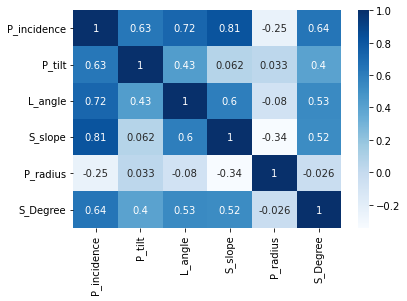

In [22]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [23]:
#B

#### 1. S_slope and P_incidence is having stronger positive correlation i.e. 0.81.
#### 2. L_angle and P_incidence is having stronger positive correlation i.e. 0.72.
#### 3. P_tilt is having weaker correlation with S_Slope and P_radius respectively with values 0.062 and 0.033.

In [24]:
#C

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [26]:
# There are some duplicated index for the merged dataframe
df[df.index.duplicated()]

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,type_h
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,type_h
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,type_h
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,type_h
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,type_h
...,...,...,...,...,...,...,...
55,47.657730,13.277385,36.679985,34.380345,98.249781,6.273012,type_s
56,43.349606,7.467469,28.065483,35.882137,112.776187,5.753277,type_s
57,46.855781,15.351514,38.000000,31.504267,116.250917,1.662706,type_s
58,43.203185,19.663146,35.000000,23.540039,124.846109,-2.919076,type_s


In [27]:
# The duplicated index will cause an error, so trying to reset the index
df.reset_index(inplace=True)

In [28]:
#Now there are no duplicated index
df[df.index.duplicated()]

,index,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class


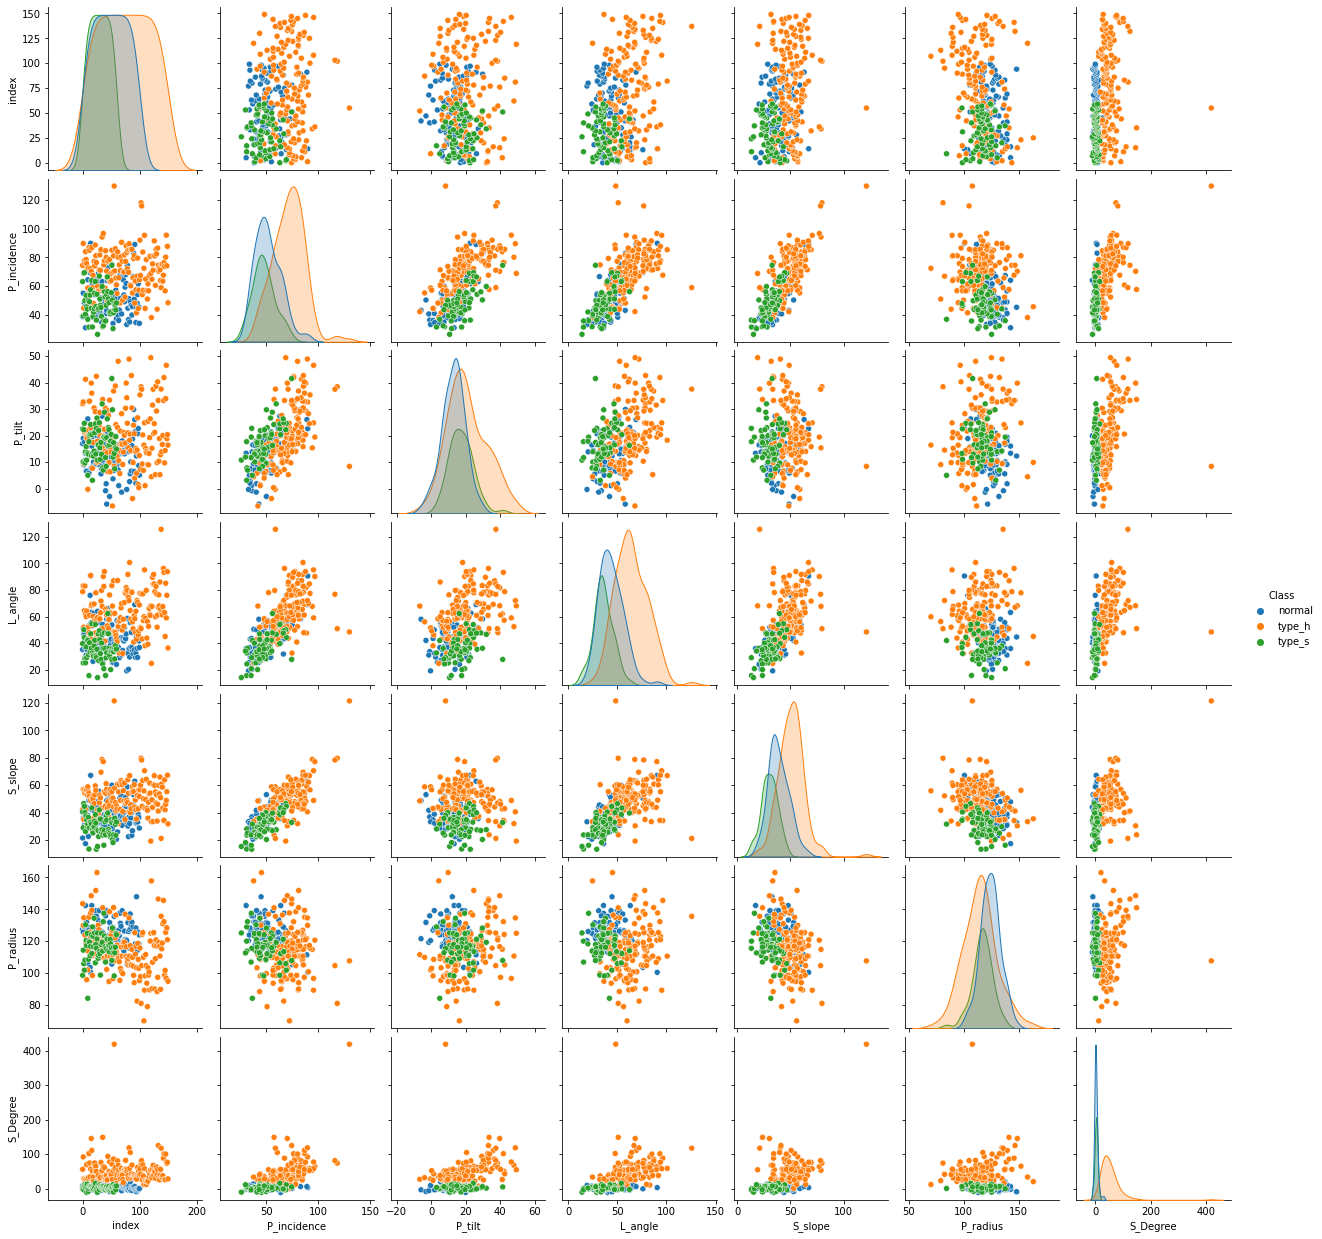

In [29]:
sns.pairplot(df,hue='Class')

#### 1. Normal distribution is observed for all the 3 classes separately for all the features except few
#### 2. type_h datapoints are observed to have higher values for all the features

In [30]:
# D

/Users/gowthamswaminathan/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


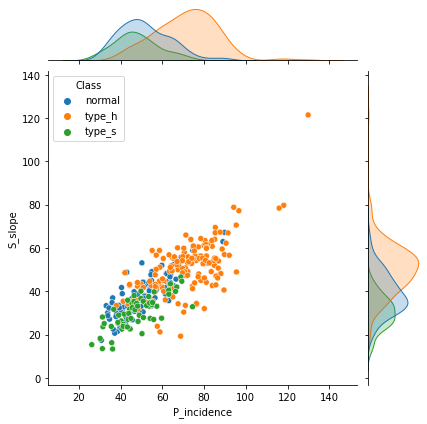

In [31]:
sns.jointplot(df['P_incidence'],df['S_slope'],hue=df['Class'])

#### P_incidnece and S_slope are having strong linear relationship.
#### Skewness is observed in both the casese for all the 3 classes separately.

In [32]:
# E

In [33]:
df.columns

Index(['index', 'P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius',
       'S_Degree', 'Class'],
      dtype='object')

<AxesSubplot:xlabel='Class', ylabel='S_slope'>

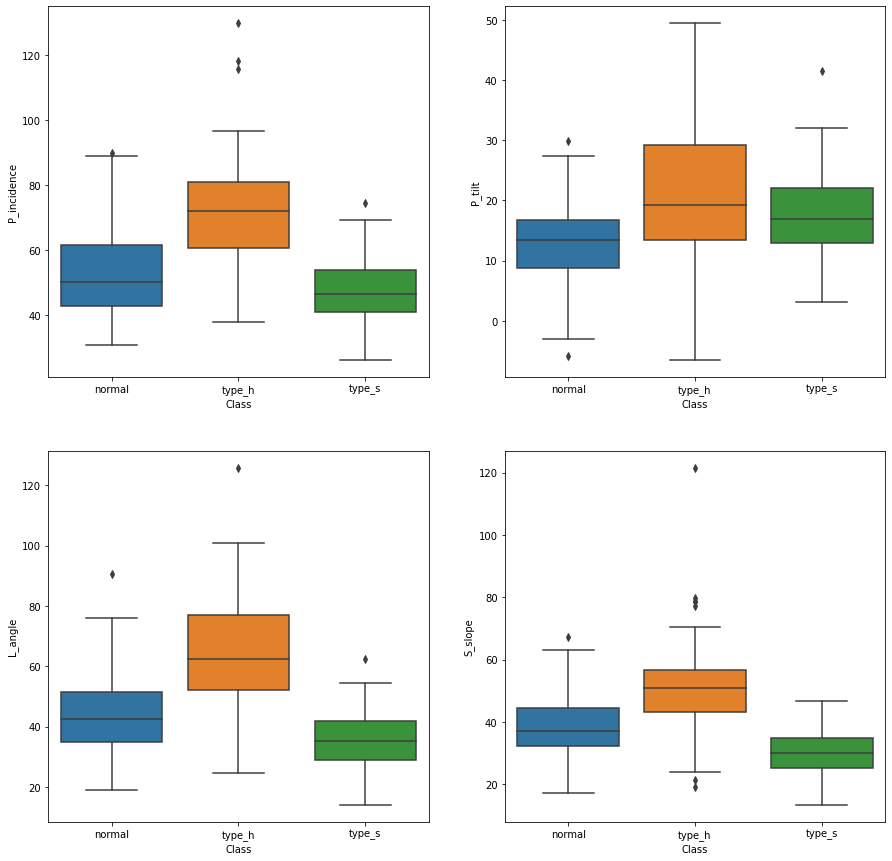

In [34]:
f, axes = plt.subplots(2, 2)
f.set_figheight(15)
f.set_figwidth(15)
sns.boxplot(  y="P_incidence", x= "Class", data=df,  orient='v' , ax=axes[0][0])
sns.boxplot(  y="P_tilt", x= "Class", data=df,  orient='v' , ax=axes[0][1])
sns.boxplot(  y="L_angle", x= "Class", data=df,  orient='v' , ax=axes[1][0])
sns.boxplot(  y="S_slope", x= "Class", data=df,  orient='v' , ax=axes[1][1])

#### Outliers observed in the features: S_slope, P_incidence

# Q4. Model Building

In [35]:
#A

In [36]:
X = df.drop('Class',axis=1)
y = df['Class']

In [37]:
#B

In [38]:
x_train, x_test,y_train,y_test = train_test_split(X,y,random_state=67,test_size=.2)

In [39]:
# C

In [40]:
knn = KNeighborsClassifier()

In [41]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [42]:
train_pred = knn.predict(x_train)
test_pred = knn.predict(x_test)

In [43]:
#D
print("Train Accuracy is: ",accuracy_score(y_train,train_pred))
print('*'*40)
print("Test Accuracy is: ",accuracy_score(y_test,test_pred))
print('*'*40)
print("Training metrics: \n",classification_report(y_train,train_pred))
print('*'*40)
print("Testing metrics: \n",classification_report(y_test,test_pred))
print('*'*40)

Train Accuracy is:  0.8951612903225806
****************************************
Test Accuracy is:  0.8709677419354839
****************************************
Training metrics: 
               precision    recall  f1-score   support

      normal       0.83      0.85      0.84        82
      type_h       0.98      0.94      0.96       121
      type_s       0.79      0.84      0.82        45

    accuracy                           0.90       248
   macro avg       0.87      0.88      0.87       248
weighted avg       0.90      0.90      0.90       248

****************************************
Testing metrics: 
               precision    recall  f1-score   support

      normal       0.81      0.72      0.76        18
      type_h       0.96      0.93      0.95        29
      type_s       0.78      0.93      0.85        15

    accuracy                           0.87        62
   macro avg       0.85      0.86      0.85        62
weighted avg       0.88      0.87      0.87        62


# Q5 Performance Improvement

In [44]:
knn_1 = KNeighborsClassifier(n_neighbors=25,algorithm='ball_tree',weights='distance',p=2)
knn_1.fit(x_train,y_train)
train_pred = knn_1.predict(x_train)
test_pred = knn_1.predict(x_test)

print("Train Accuracy is: ",accuracy_score(y_train,train_pred))
print('*'*40)
print("Test Accuracy is: ",accuracy_score(y_test,test_pred))
print('*'*40)
print("Training metrics: \n",classification_report(y_train,train_pred))
print('*'*40)
print("Testing metrics: \n",classification_report(y_test,test_pred))
print('*'*40)

Train Accuracy is:  1.0
****************************************
Test Accuracy is:  0.9032258064516129
****************************************
Training metrics: 
               precision    recall  f1-score   support

      normal       1.00      1.00      1.00        82
      type_h       1.00      1.00      1.00       121
      type_s       1.00      1.00      1.00        45

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248

****************************************
Testing metrics: 
               precision    recall  f1-score   support

      normal       0.83      0.83      0.83        18
      type_h       1.00      0.93      0.96        29
      type_s       0.82      0.93      0.87        15

    accuracy                           0.90        62
   macro avg       0.89      0.90      0.89        62
weighted avg       0.91      0.90      0.90        62

**************

In [45]:
#B

1. Training accuracy has gone up by 10%
2. Testing Precision and recall values of type_h have gone up by 4% by compromising 'type_s' and 'normal'

In [46]:
# C

- Parameter 'weights' = 'distance' played key role in improving training accuracy
- When 'weights' = 'distance' has higher influence of neighboring datapoints instead of uniform resulting into better predictions.

# Part 2

**CONTEXT:**  A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee  majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the  borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an  average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing  department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit  with same budget as per last campaign. 

**DATA DICTIONARY:**

1. ID: Customer ID 
2. Age: Customer’s approximate age. 
3. CustomerSince: Customer of the bank since. [unit is masked] 
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked] 
5. ZipCode: Customer’s zip code. 
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP. 
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked] 
8. Level: A level associated to the customer which is masked by the bank as an IP. 
9. Mortgage: Customer’s mortgage. [unit is masked] 
10. Security: Customer’s security asset with the bank. [unit is masked] 
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked] 
12. InternetBanking: if the customer uses internet banking. 
13. CreditCard: if the customer uses bank’s credit card. 
14. LoanOnCard: if the customer has a loan on credit card. 


**PROJECT OBJECTIVE:** Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert using the historical dataset. 


**STEPS AND TASK [30 Marks]:**

1. **Data Understanding and Preparation: [5 Marks]**
    * Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. [1 Marks]
    * Print shape and Column Names and DataTypes of both the Dataframe. [1 Marks]
    * Merge both the Dataframe on ‘ID’ feature to form a single DataFrame [2 Marks]
    * Change Datatype of below features to ‘Object’ [1 Marks]
 	    * *[‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’]*
		* *[Reason behind performing this operation:- Values in these features are binary i.e. 1/0. But DataType is ‘int’/’float’ which is not expected.]*
2. **Data Exploration and Analysis: [5 Marks]**
    * Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. [2 Marks]
    * Check the percentage of missing values and impute if required. [1 Marks]
    * Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]
		* *[Unexpected values means if all values in a feature are 0/1 then ‘?’, ‘a’, 1.5 are unexpected values which needs treatment]*
3. **Data Preparation and model building: [10 Marks]**
    * Split data into X and Y. [1 Marks]
        * *[Recommended to drop ID & ZipCode. LoanOnCard is target Variable]*
    * Split data into train and test. Keep 25% data reserved for testing. [1 Marks]
    * Train a Supervised Learning Classification base model - Logistic Regression. [2 Marks]
    * Print evaluation metrics for the model and clearly share insights. [1 Marks]
    * Balance the data using the right balancing technique. [2 Marks]
        * Check distribution of the target variable
        * Say output is class A : 20% and class B : 80%
        * Here you need to balance the target variable as 50:50.
        * Try appropriate method to achieve the same.
    * Again train the same previous model on balanced data. [1 Marks]
    * Print evaluation metrics and clearly share differences observed. [2 Marks]
4. **Performance Improvement: [10 Marks]**
    * Train a base model each for SVM, KNN. [4 Marks]
    * Tune parameters for each of the models wherever required and finalize a model. [3 Marks]
        * *(Optional: Experiment with various Hyperparameters - Research required)*
    * Print evaluation metrics for final model. [1 Marks]
    * Share improvement achieved from base model to final model. [2 Marks]

# Q1 Data Understanding and Preparation

In [47]:
# A

In [48]:
df1 = pd.read_csv('Data1.csv')
df2 = pd.read_csv('Data2.csv')

In [49]:
# B

In [50]:
print(df1.info())
print('-'*30)
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB
None
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  


In [51]:
# C

In [52]:
df = pd.merge(df1, df2,on='ID')

In [53]:
# D

In [54]:
# lst_key = ['LoanOnCard','CreditCard','InternetBanking','FixedDepositAccount','Security','Level','HiddenScore']
lst_key = ['CreditCard','InternetBanking','FixedDepositAccount','Security','Level','HiddenScore']
lst_val = ['object']*len(lst_key)

In [55]:
data_dict = {lst_key[i]: lst_val[i] for i in range(len(lst_key))}

In [56]:
data_dict

{'CreditCard': 'object',
 'InternetBanking': 'object',
 'FixedDepositAccount': 'object',
 'Security': 'object',
 'Level': 'object',
 'HiddenScore': 'object'}

In [57]:
df = df.astype(data_dict)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


# Q2 Data Exploration and Analysis

In [59]:
# A

<AxesSubplot:>

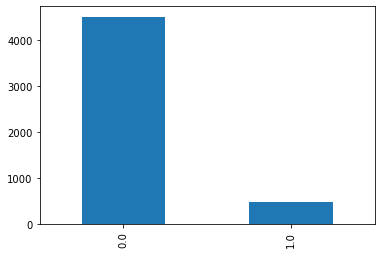

In [60]:
df['LoanOnCard'].value_counts().plot(kind='bar')

 Data is highly imbalanced towards 'No'

In [61]:
# B

In [62]:
df.isna().sum()/len(df)*100

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64

0.4% Null values in LoanOnCard

In [63]:
df.dropna(inplace=True)

In [64]:
df.isna().sum()/len(df)*100

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.0
dtype: float64

In [65]:
# C

In [66]:
col_list = df.select_dtypes(include='object').columns

In [67]:
for i in col_list:
    print('Unique values in {} are \n'.format(i),df[i].value_counts())
    print(i)
    print('*'*20)

Unique values in HiddenScore are 
 1    1466
2    1293
4    1215
3    1006
Name: HiddenScore, dtype: int64
HiddenScore
********************
Unique values in Level are 
 1    2089
3    1496
2    1395
Name: Level, dtype: int64
Level
********************
Unique values in Security are 
 0    4460
1     520
Name: Security, dtype: int64
Security
********************
Unique values in FixedDepositAccount are 
 0    4678
1     302
Name: FixedDepositAccount, dtype: int64
FixedDepositAccount
********************
Unique values in InternetBanking are 
 1    2974
0    2006
Name: InternetBanking, dtype: int64
InternetBanking
********************
Unique values in CreditCard are 
 0    3514
1    1466
Name: CreditCard, dtype: int64
CreditCard
********************


No unknown values observed

# Q3 Data Preparation and model building

In [68]:
# A

In [69]:
X = df.drop(['LoanOnCard','ID','ZipCode'],axis=1)
y = df['LoanOnCard']

In [70]:
# B

In [71]:
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state = 90,test_size=0.25)

In [72]:
# C

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
x_train.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
3981,64,39,22,3,0.50,1,0,1,1,1,1
1270,43,18,60,2,2.20,3,0,0,0,0,1
1336,36,12,42,1,1.33,1,0,0,0,1,0
2123,28,2,9,1,0.10,2,0,0,0,1,0
1808,55,31,50,4,1.50,1,0,0,0,1,0


In [75]:
lr = LogisticRegression(solver='lbfgs',max_iter=2000)
# lr.fit(x_train,y_train.astype('int'))
lr.fit(x_train,y_train)


LogisticRegression(max_iter=2000)

In [76]:
train_pred = lr.predict(x_train)
test_pred = lr.predict(x_test)

In [77]:
test_pred.shape

(1245,)

In [78]:
y_test.shape

(1245,)

In [79]:
# D

In [80]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      3375
         1.0       0.82      0.62      0.70       360

    accuracy                           0.95      3735
   macro avg       0.89      0.80      0.84      3735
weighted avg       0.95      0.95      0.95      3735



In [81]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1125
         1.0       0.90      0.63      0.75       120

    accuracy                           0.96      1245
   macro avg       0.93      0.81      0.86      1245
weighted avg       0.96      0.96      0.95      1245



It is observed that accuracy is more but precision and recall values are on lower side for event 1.

In [82]:
# E
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [83]:
undersample = RandomUnderSampler(sampling_strategy=0.5)
oversample = RandomOverSampler(sampling_strategy='minority')

In [84]:
X_under, y_under = undersample.fit_resample(X, y)

In [85]:
X_under.shape

(1440, 11)

In [86]:
y_under.shape

(1440,)

In [87]:
y_under.value_counts()

0.0    960
1.0    480
Name: LoanOnCard, dtype: int64

In [88]:
X_new,y_new = oversample.fit_resample(X_under, y_under)

In [89]:
y_new.value_counts()

0.0    960
1.0    960
Name: LoanOnCard, dtype: int64

In [90]:
#F
x_train,x_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.25,random_state=87)

In [91]:
lr.fit(x_train,y_train)
train_pred = lr.predict(x_train)
test_pred = lr.predict(x_test)

In [92]:
# G
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91       725
         1.0       0.91      0.91      0.91       715

    accuracy                           0.91      1440
   macro avg       0.91      0.91      0.91      1440
weighted avg       0.91      0.91      0.91      1440



In [93]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       235
         1.0       0.91      0.91      0.91       245

    accuracy                           0.90       480
   macro avg       0.90      0.90      0.90       480
weighted avg       0.90      0.90      0.90       480



Accuracy, precision and recall are improved and close to each other after balancing the data

# Q4 Performance Improvement

In [94]:
# A
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [95]:
def classify(classifier):
    classifier.fit(x_train,y_train)
    pred_train = classifier.predict(x_train)
    pred_test = classifier.predict(x_test)
    print('Training Performace')
    print(classification_report(y_train,pred_train))
    print('*'*50)
    print('Testing Performace')
    print(classification_report(y_test,pred_test))
    

In [96]:
svm = SVC()
classify(svm)

Training Performace
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89       725
         1.0       0.86      0.94      0.90       715

    accuracy                           0.89      1440
   macro avg       0.89      0.89      0.89      1440
weighted avg       0.90      0.89      0.89      1440

**************************************************
Testing Performace
              precision    recall  f1-score   support

         0.0       0.90      0.81      0.85       235
         1.0       0.83      0.91      0.87       245

    accuracy                           0.86       480
   macro avg       0.87      0.86      0.86       480
weighted avg       0.87      0.86      0.86       480



In [97]:
nb = GaussianNB()
classify(nb)

Training Performace
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       725
         1.0       0.88      0.80      0.84       715

    accuracy                           0.85      1440
   macro avg       0.85      0.84      0.84      1440
weighted avg       0.85      0.85      0.84      1440

**************************************************
Testing Performace
              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80       235
         1.0       0.83      0.75      0.79       245

    accuracy                           0.79       480
   macro avg       0.80      0.79      0.79       480
weighted avg       0.80      0.79      0.79       480



In [98]:
# B & C

In [99]:
# SVM

In [100]:
svm = SVC(C=5,kernel='rbf',gamma='auto')
classify(svm)

Training Performace
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       725
         1.0       1.00      1.00      1.00       715

    accuracy                           1.00      1440
   macro avg       1.00      1.00      1.00      1440
weighted avg       1.00      1.00      1.00      1440

**************************************************
Testing Performace
              precision    recall  f1-score   support

         0.0       0.82      0.94      0.87       235
         1.0       0.93      0.80      0.86       245

    accuracy                           0.87       480
   macro avg       0.87      0.87      0.87       480
weighted avg       0.88      0.87      0.87       480



In [101]:
# D

Improvement Achieved:
+6-7% in both train and test data for accuracy, precision, recall.